### 설치

- window
    - conda install -y -c peterjc123 pytorch
- mac/linux
    - conda install -y pytorch torchvision -c pytorch
  
- 가장 마지막에 강사님이 수정해주신 설치문
    - conda install pytorch-cpu torchvision-cpu -c pytorch

### PyTorch( 파이토치 )

- 딥러닝 프레임웍(엔진)
- Lua(루아) 언어로 만든 오픈소스 라이브러리
- 뉴욕대 + 페이스북 공동 개발
- 루아로 만들어 뒀을때는 별로 인기가 없었다( 접근성 힘듬 ), 파이썬 버전으로 나오고나서 1.0발표후 급격하게 증가
- 딥러닝 프레임웍의 특성
    - 복잡한, 큰 계산 그래프를 손쉽게 개발할 수 있다
    - 계산 그래프를 이용하여 미적분 같은 연산도 쉽게 처리 
    - GPU 연산을 효율적으로 수행
- 파이토치 특징
    - Numpy 기반 Tensor 연산을 GPU로 수행 가능 
    - 자동미분시스템을 이용하여 모델을 쉽게 구성한다
    - 파이썬과 같이 활용
        - scipy :과학 컴퓨팅과 기술 컴퓨팅에 사용
        - Numpy : 행렬, 대규모의 다차원 배열을 쉽게 처리하는 수학, 과학용 라이브러리
        - Cython : 파이썬의 빠른 생산성, 외부 C의 강력한 처리속도를 연동하여 수행
    - Dynamic Graph Define : 변수 선언 동시에 그래프를 그리고 연산을 가능하게 만든다

### Tensorflow vs PyTorch
** 장르의 경계는 없다 **

- Tensorflow : 산업용
    - Define-and-Run 방식
        - 계산 그래프를 그림
        - 세션에 그래프에 들어갈 수치를 대입
        - 연산 실행
- PyTorch : 학계용
    - Define-by-Run 방식
        - 계산 그래프를 그리는 동시에
        - 그래프에 들어간 숫자를 보관하고 있고
        - 연산 실행이 바로 수행 가능하다
    - 2018.10 이후 산업용으로 확산되고 있다. ( 제품화 솔루션을 지원 )

- 텐서 : Tensor
    - 딥러닝은 텐서를 기반으로 진행하는 연산의 연속
    - 텐서의 종류 : 딥러닝의 중요 단위
    
    <img src='./8.tensor.jpeg' >

In [8]:
import torch
import numpy as np

In [9]:
# 리스트로부터 텐서 생성
tmp_list = [[1,2,3],[4,5,6]] 
x_list_tensor = torch.Tensor( tmp_list ) # 그냥 tensorflow 같은 경우에는 sess를 통해서 run해야 돌아가는데 torch는 파이썬처럼 바로 실행
# 텐서를 생성하면 정수값도 float(실수)로 변환된다
x_list_tensor

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [10]:
# 원복 : Tensor => 리스트 추출
x_list_tensor.tolist() # list로 내보낸다는 뜻

[[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]]

In [11]:
# 배열(numpy ndarray) : 
x_numpy_array = np.array( tmp_list )
x_numpy_array # 2차원 배열(매트릭스) 출력

array([[1, 2, 3],
       [4, 5, 6]])

In [12]:
x = torch.Tensor( x_numpy_array )
x

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [13]:
# 원복
x.numpy() # 행렬을 넣어서 만들고 행렬을 빼서 만들고 

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

- GPU

In [14]:
x.device

device(type='cpu')

In [15]:
# NVIDIA의 cuda 지원 여부
device ='cuda'
try :
    x = x.to(device)
    print('%s 지원' % device, x )
except Exception as e :
    print('%s 미지원' % device, e )

cuda 미지원 Torch not compiled with CUDA enabled


In [16]:
device = 'cpu'
try :
    x = x.to(device)
    print('%s 지원' % device, x )
except Exception as e :
    print('%s 미지원' % device, e )

cpu 지원 tensor([[1., 2., 3.],
        [4., 5., 6.]])


- 랜덤 텐서 생성

In [17]:
# 2x3 행렬(매트릭스)을 생성하게 된다, 난수값 0~1사이
torch.rand(2, 3)


tensor([[0.8001, 0.9320, 0.9456],
        [0.0104, 0.0650, 0.9573]])

In [18]:
# 0~5( 0 <= x < 5 ) 사이 랜덤값 2x3 행렬 생성
torch.randint( low=0, high=5, size=(2,3) ) # 0과 5사이 , 확률적으로 5는 안나온다

tensor([[3, 4, 2],
        [0, 3, 4]])

In [19]:
# 영행렬
torch.zeros( 2, 2 )

tensor([[0., 0.],
        [0., 0.]])

In [20]:
# 구성원이 1인 행렬
torch.ones( 2, 2 )

tensor([[1., 1.],
        [1., 1.]])

In [21]:
# 특정 텐서의 크기와 동일한 영행렬을 만들어라
torch.zeros_like( x )

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [22]:
# 특정 텐서의 크기와 동일한 영행렬을 만들어라
torch.ones_like( x )

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [23]:
# GPU 기반으로 만들고 싶을 때 쓰는 알고리즘
# GPU를 이용하여 동일 크기의 영행렬 생성
try :
    torch.zeros_like( x.cuda() )
except Exception as e : pass

- 텐서의 타입
    - dtype : numpy 기준으로 쓰는 표현
    - 결국에는 다 동일한 것을 뜻한다(형식은 같은데 표현은 다른것이다)
    <img src='./8.torch_type.png'>

In [24]:
# 실수형 텐서
a = torch.FloatTensor( x_numpy_array )

In [25]:
# 타입 확인은 tensor.type() 을 쓰도록 한다
a.type(), type(a), a


('torch.FloatTensor', torch.Tensor, tensor([[1., 2., 3.],
         [4., 5., 6.]]))

In [26]:
# 정수형 텐서
b = torch.IntTensor( x_numpy_array )
b.type(), b # 별도 지정안하면 float로 갈 것이고, 지정을 하면int로 되든 다른것이 될 것이다(명확하게 타입을 정의할 필요가 있다)

('torch.IntTensor', tensor([[1, 2, 3],
         [4, 5, 6]], dtype=torch.int32))

In [27]:
# numpy ndarray => 행렬의 구성의 모든 타입은 동일하다

In [28]:
# 8-bit unsigned ByteTensor, 2진 데이터
c = torch.ByteTensor( [True, False, True, False] )
c.type(), c # 불리언

('torch.ByteTensor', tensor([1, 0, 1, 0], dtype=torch.uint8))

- 텐서 오퍼레이션
    - 슬라이싱
    - 뷰
    - 트렌스포즈 
    - 스퀴즈, 언스퀴즈
    - 캣(cat), 스택(stack)
    - 기본연산 (더하기, 빼기, 곱하기, 나누기)
    - 최대, 최소
    - 논리연산

- Slicing

In [29]:
# 작업의 일관성을 주기 위해 -> 씨드를 준다 
torch.manual_seed( 555 )

In [30]:
# 크기가 2,3,4 인 3차원 텐서(큐브)를 생성하시오, 값은 0 <= n < 9, 변수는 x, 정수, 랜덤
x = torch.randint( 0, 10, size=(2,3,4) ) #low=0, high=10, size=(2,3,4) )

In [31]:
# 차원축소를 3차 -> 2차 -> 1차 로 빼서 큐브의 9를 뺀다
# pandas에서는 , , , 로 차원을 표현해서 뺐었다 

In [32]:
x[0] # matrix가 됨

tensor([[6, 0, 3, 5],
        [8, 3, 4, 0],
        [3, 1, 4, 9]])

In [33]:
x[0][2]

tensor([3, 1, 4, 9])

In [34]:
# 차원 축소하는 방식은 차원별로 []를 사용하는 방법도 가능
x[0][2][3]

tensor(9)

In [35]:
# 차원별로 인덱스를 나열하는 것도 가능
x[0, 2, 3]

tensor(9)

In [36]:
# 텐서 시각화
import matplotlib.pyplot as plt

In [37]:
# 크기가 2,3,4 인 3차원
len(x), len(x[0])

(2, 3)

In [38]:
def tensor_draw( tmp ):
    fig, axes = plt.subplots( len(tmp), 1 ) # 하나 이상 plot는 s를 붙여서 plots로 표현, len(tmp) : 2개의 2차원을 표현하겠다는 뜻이다
    for i in range( len(tmp) ) : # 2차원 이기 때문에 2바퀴를 돌 것이다
        # 차트의 최대값1, 최소값0, 배열의 1차원의 첫번째 두번째 등 ..각각 그린다
        # 값이 0 혹은 1 이므로 연산의 결과를 필터를 통과시켜 영향을 받는 부분을
        # 0으로 표시하여, 시각화 시 검은색으로 표현된 부분이 연산의 영향받은 부분으로 판정
        
        axes[i].matshow( tmp.numpy()[i], vmin=0, vmax=1, cmap='gray' ) # axes[i] : 차트가 돤다 -> tmp(텐서)에서 numpy를 뽑는다
    plt.show()
    
    

In [41]:
# x와 동일한 크기의 텐서인 1로 채워진 큐브(행렬)를 구성하시오
tmp = torch.ones_like(x) # 1로 채워진 : ones
tmp

tensor([[[1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1]],

        [[1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1]]])

In [42]:
# x[ 0, 1, 2, 3 ] 값을 찾아라
# 시각적으로 위치가 어디인가
tmp[0,2,3] = 0 # 원본에다가 값을 바꿔준다

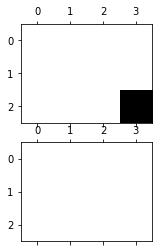

In [43]:
tensor_draw( tmp )

In [44]:
tmp1 = torch.zeros_like(x)
tmp1

tensor([[[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],

        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]]])

In [45]:
tmp1[ 0, 2, 3 ] = 1

In [46]:
x * tmp1

tensor([[[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 9]],

        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]]])

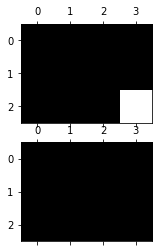

In [47]:
# 인덱싱을 하는 것과 비슷하다
tensor_draw( x * tmp1 ) # 필요없는것은 제외하고 필요한것만 표시

In [48]:
x[0, :2, 3] # 결론적으로 2개가 나온다, 2x1 (벡터로 출력)

tensor([5, 0])

In [49]:
tmp1 = torch.zeros_like(x)

In [50]:
tmp1[0, :2, 3] = 1
tmp1

tensor([[[0, 0, 0, 1],
         [0, 0, 0, 1],
         [0, 0, 0, 0]],

        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]]])

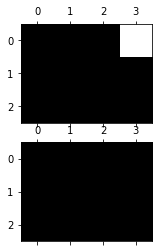

In [51]:
tensor_draw( x * tmp1 )

- view
    - 쉐이프(shape)의 변경
    - numpy reshape()과 동일, 실제도 그 함수 존재

In [52]:
x.shape

torch.Size([2, 3, 4])

In [53]:
# x = 2*3*4 => 24

In [54]:
# 2 * 2 * 6 = 24 , 스칼라는 맞춰야 한다
# 순차적으로 6개를 맞추고, 부족하면 다음 차원에서 당기고
# 다음번은 사용한 다음부터 차례대로 개수를 맞춰서 차원을 구성
x.view( 2, 2, 6 ) # 위의 x.shape과 비교해 볼 것

tensor([[[6, 0, 3, 5, 8, 3],
         [4, 0, 3, 1, 4, 9]],

        [[6, 4, 0, 8, 5, 4],
         [9, 3, 4, 0, 0, 8]]])

In [55]:
x.reshape( 2, 2, 6 ) # reshape(tensor에서 쓸 경우 호환 좋다)을 써도 되고, view를 써도 상관없다

tensor([[[6, 0, 3, 5, 8, 3],
         [4, 0, 3, 1, 4, 9]],

        [[6, 4, 0, 8, 5, 4],
         [9, 3, 4, 0, 0, 8]]])

In [56]:
# -1 : 몇개가 될지 모르겠다. 뒤를 맞추고 나오는대로 앞에를 세팅
x.view( -1, 1, 12 )

tensor([[[6, 0, 3, 5, 8, 3, 4, 0, 3, 1, 4, 9]],

        [[6, 4, 0, 8, 5, 4, 9, 3, 4, 0, 0, 8]]])

- transpose : 차원 맞교환

In [57]:
x, x.shape

(tensor([[[6, 0, 3, 5],
          [8, 3, 4, 0],
          [3, 1, 4, 9]],
 
         [[6, 4, 0, 8],
          [5, 4, 9, 3],
          [4, 0, 0, 8]]]), torch.Size([2, 3, 4]))

In [58]:
# 0차원과 1차원을 맞교환 한다
# 2x3x4 => 3x2x4
x_trans = x.transpose( 0, 1 ) 
x_trans.size()

torch.Size([3, 2, 4])

In [59]:
x_trans # 첫번째와 첫번째를 묶어서 첫번째를 만들고, 두번째와 두번째를 합쳐서 두번째를 만들고, 세번째와 세번째를 합쳐서 세번째를 만들었다.

tensor([[[6, 0, 3, 5],
         [6, 4, 0, 8]],

        [[8, 3, 4, 0],
         [5, 4, 9, 3]],

        [[3, 1, 4, 9],
         [4, 0, 0, 8]]])

- squeeze, unsqueeze

In [60]:
x = torch.rand( (2, 1, 3, 5, 1) ) # 튜플을 넣어준다면, 랜덤에 크기만 지정해준다, 5차원 만들어짐, 마지막 차원인1이 1이라서 한개씩 들어간다(결국 마지막 차원만 주의깊게 보면 된다)
x

tensor([[[[[0.0398],
           [0.8046],
           [0.5817],
           [0.6492],
           [0.1950]],

          [[0.8084],
           [0.3840],
           [0.5138],
           [0.5459],
           [0.1367]],

          [[0.8506],
           [0.1196],
           [0.5192],
           [0.8217],
           [0.9222]]]],



        [[[[0.8682],
           [0.5972],
           [0.5665],
           [0.7233],
           [0.4122]],

          [[0.2826],
           [0.4488],
           [0.7025],
           [0.1841],
           [0.5332]],

          [[0.8836],
           [0.1434],
           [0.7834],
           [0.4374],
           [0.0954]]]]])

In [61]:
# 모든 차원에서 1차값을 가진 차원을 제거 => 2, 3, 5 ( 차원 하나는 의미가 없기 때문에 걷어낸다 ) -> 그럼 5개씩(마지막 차원이 5이기 때문이다) 묶여서 하나에 들어간다
x.squeeze().size()

torch.Size([2, 3, 5])

In [62]:
x.squeeze() # 결국에는 연산량이 줄어든다

tensor([[[0.0398, 0.8046, 0.5817, 0.6492, 0.1950],
         [0.8084, 0.3840, 0.5138, 0.5459, 0.1367],
         [0.8506, 0.1196, 0.5192, 0.8217, 0.9222]],

        [[0.8682, 0.5972, 0.5665, 0.7233, 0.4122],
         [0.2826, 0.4488, 0.7025, 0.1841, 0.5332],
         [0.8836, 0.1434, 0.7834, 0.4374, 0.0954]]])

In [63]:
# 위에랑 똑같은데 인자 1을 집어넣어주면 앞쪽에서 처음 존재하는 1을 제거한다
# 행렬의 두번째 차원 (인덱스로는 1 )를 스퀴즈 한다.
# 스퀴즈는 차원이 1일 경우에만 사용 가능하다
x.squeeze(1).size()
x 

tensor([[[[[0.0398],
           [0.8046],
           [0.5817],
           [0.6492],
           [0.1950]],

          [[0.8084],
           [0.3840],
           [0.5138],
           [0.5459],
           [0.1367]],

          [[0.8506],
           [0.1196],
           [0.5192],
           [0.8217],
           [0.9222]]]],



        [[[[0.8682],
           [0.5972],
           [0.5665],
           [0.7233],
           [0.4122]],

          [[0.2826],
           [0.4488],
           [0.7025],
           [0.1841],
           [0.5332]],

          [[0.8836],
           [0.1434],
           [0.7834],
           [0.4374],
           [0.0954]]]]])

In [64]:
# 인덱스 3번인 4차원 자리에 차원의 크기 1인 행렬을 삽입 ( 3과 5 사이에 1이 하나 들어간다 )
x.unsqueeze(3).size() 

torch.Size([2, 1, 3, 1, 5, 1])

- cat, stack ( 데이터프레임에서 경합(merge, concat과 비슷한 맥락이라고 생각하면 된다)

In [65]:
A = torch.rand( ( 2, 3 ) )
B = torch.rand( ( 2, 3 ) )
A, B

(tensor([[0.2786, 0.1950, 0.0398],
         [0.6467, 0.6456, 0.3175]]), tensor([[0.5047, 0.3846, 0.7256],
         [0.3551, 0.6297, 0.1817]]))

In [66]:
# 병합이 된다
AB_cat = torch.cat( [ A, B ], dim=0 ) # 1차원으로 붙인다
AB_cat 

tensor([[0.2786, 0.1950, 0.0398],
        [0.6467, 0.6456, 0.3175],
        [0.5047, 0.3846, 0.7256],
        [0.3551, 0.6297, 0.1817]])

In [67]:
AB_cat.size()

torch.Size([4, 3])

In [68]:
AB_cat = torch.cat( [ A, B ], dim=1 ) # 2차원으로 붙인다
AB_cat

tensor([[0.2786, 0.1950, 0.0398, 0.5047, 0.3846, 0.7256],
        [0.6467, 0.6456, 0.3175, 0.3551, 0.6297, 0.1817]])

In [69]:
AB_cat.size()

torch.Size([2, 6])

In [70]:
# 0차에 A와 B를 차례대로 쌓는다 => 차원이 하나더 생긴다
AB_stack = torch.stack( [ A, B ], dim=0 )
AB_stack.size()

torch.Size([2, 2, 3])

In [71]:
AB_stack # 배열안에 배열안에 값이 들어간다

tensor([[[0.2786, 0.1950, 0.0398],
         [0.6467, 0.6456, 0.3175]],

        [[0.5047, 0.3846, 0.7256],
         [0.3551, 0.6297, 0.1817]]])

- 사칙연산 ( 행렬연산에 대한 것 )

In [72]:
# x = torch.Tensor( [ 1, 2, 3 ] )
# y = torch.Tensor( [ 4, 3, 2 ] )

In [73]:
x = torch.Tensor( [ 1, 2, -3 ] )
y = torch.Tensor( [ 4, -3, 2 ] )

In [74]:
x.shape, y.shape, x.size(), y.size() # 1차원

(torch.Size([3]), torch.Size([3]), torch.Size([3]), torch.Size([3]))

In [75]:
# 더하기  # 정수라고 설정을 하지 않으면 float(실수)로 기본으로 나온다
x + y

tensor([ 5., -1., -1.])

In [76]:
# 교환법칙 성립
# 정수라고 설정을 하지 않으면 float(실수)로 기본으로 나온다
y + x

tensor([ 5., -1., -1.])

In [77]:
# 빼기, 교환법칙 성립안함
x - y

tensor([-3.,  5., -5.])

In [78]:
y - x

tensor([ 3., -5.,  5.])

In [79]:
# 곱하기, 교환법칙 성립(전제는 x와 y의 shape은 똑같다 -> 같은 사이즈에서 연산했을 경우 성립한다)
x * y

tensor([ 4., -6., -6.])

In [80]:
y * x

tensor([ 4., -6., -6.])

In [81]:
torch.mul( x, y ) # * 써도 되고, 함수써도 된다

tensor([ 4., -6., -6.])

In [82]:
# 나누기, 교환법칙 성립안한다
x / y

tensor([ 0.2500, -0.6667, -1.5000])

In [83]:
y / x

tensor([ 4.0000, -1.5000, -0.6667])

In [84]:
# dot
# x1*y1 + x2*y2 + ... -> 자리끼리 곱해서 총합을 쓴것이다.
# dot연산은 한 점으로 수렴한다 ( 맨 위에서 본 이미지 확인할 것 )
torch.dot( x, y )

tensor(-8.)

- sum, mean

In [92]:
# 2x2x2
z = torch.Tensor( [ [ [1,2],[3,4] ],[ [5,6],[7,8]] ] )
z

tensor([[[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]]])

In [93]:
torch.sum( z )

tensor(36.)

In [94]:
torch.sum( z, dim=0  )

tensor([[ 6.,  8.],
        [10., 12.]])

In [95]:
torch.mean( z )

tensor(4.5000)

In [96]:
torch.mean( z, dim=0 ) # -> 차원이 하나 줄었다, # dim= : 차원

tensor([[3., 4.],
        [5., 6.]])

- max, argmax, min, argmin

In [97]:
# 텐서의 요소들 중 최대값과 그 최대값의 위치
torch.max( z ), torch.argmax( z )

(tensor(8.), tensor(7))

In [98]:
# 텐서의 요소들 중 최소값과 그 최소값의 위치
torch.min( z ), torch.argmin( z )

(tensor(1.), tensor(0))

In [99]:
z

tensor([[[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]]])

In [100]:
torch.max( z, dim=0 )

(tensor([[5., 6.],
         [7., 8.]]), tensor([[1, 1],
         [1, 1]]))

In [101]:
torch.min( z, dim=0 )

(tensor([[1., 2.],
         [3., 4.]]), tensor([[0, 0],
         [0, 0]]))

- 논리연산 => True/False => 이진데이터의 텐서

In [102]:
z = torch.Tensor( [ -3, 2, 1, 0 ] )

In [103]:
print(z == 0)

tensor([0, 0, 0, 1], dtype=torch.uint8)


In [104]:
z.eq(0)

tensor([0, 0, 0, 1], dtype=torch.uint8)

In [105]:
z.ge(0), z >= 0

(tensor([0, 1, 1, 1], dtype=torch.uint8),
 tensor([0, 1, 1, 1], dtype=torch.uint8))

In [106]:
z.gt(0), z > 0

(tensor([0, 1, 1, 0], dtype=torch.uint8),
 tensor([0, 1, 1, 0], dtype=torch.uint8))

In [107]:
z.lt(0), z < 0, z.le(0), z <= 0

(tensor([1, 0, 0, 0], dtype=torch.uint8),
 tensor([1, 0, 0, 0], dtype=torch.uint8),
 tensor([1, 0, 0, 1], dtype=torch.uint8),
 tensor([1, 0, 0, 1], dtype=torch.uint8))